In [ ]:
from tensorflow import keras 
from tensorflow.keras import backend as K
import tensorflow as tf
import numpy as np
from PIL import Image , ImageDraw
import os
import glob
from sklearn.model_selection  import train_test_split

In [ ]:
input_dim = 228 # Size of the Image 
images = []
image_paths = glob.glob( '/content/drive/My Drive/KINECT V2 IMAGES/new depth images xml/*.bmp' ) # to add images 
for imagefile in image_paths:
    image = Image.open( imagefile ).resize((input_dim,input_dim))
    image = np.asarray( image )/255
    images.append( image )

image_paths = glob.glob( '/content/drive/My Drive/File with negative/Pos/*.bmp' ) # to add images 
for imagefile in image_paths:
    image = Image.open( imagefile ).resize((input_dim,input_dim))
    image = np.asarray( image )/255
    images.append( image )

In [ ]:
pip install xmltodict

In [ ]:
import xmltodict   #library to parse xml files 
bboxes = []
annotations_paths = glob.glob( '/content/drive/My Drive/KINECT V2 IMAGES/new depth images xml/*.xml' ) # to load all the xml files 
for xmlfile in annotations_paths:
    x = xmltodict.parse( open( xmlfile , 'rb' ) )
    name = x['annotation']['object']['name']
    if(name == "Face"):
        name1 = 1
        bndbox = x[ 'annotation' ][ 'object' ][ 'bndbox' ]
        bndbox = np.array([name1,int(bndbox[ 'xmin' ])/512 , int(bndbox[ 'ymin' ])/424, int(bndbox[ 'xmax' ])/512 , int(bndbox[ 'ymax' ])/424 ])
    else:
        name1 = 0
        bndbox = np.array([0,0,0,0,0])
    bboxes.append( bndbox ) 
annotations_paths = glob.glob( '/content/drive/My Drive/File with negative/Pos/*.xml' ) # to load all the xml files 
for xmlfile in annotations_paths:
    x = xmltodict.parse( open( xmlfile , 'rb' ) )
    name = x['annotation']['object']['name']
    if(name == "Face"):
        name1 = 1
        bndbox = x[ 'annotation' ][ 'object' ][ 'bndbox' ]
        bndbox = np.array([name1,int(bndbox[ 'xmin' ])/512 , int(bndbox[ 'ymin' ])/424, int(bndbox[ 'xmax' ])/512 , int(bndbox[ 'ymax' ])/424 ])
    else:
        name1 = 0
        bndbox = np.array([0,0,0,0,0])
    bboxes.append( bndbox )    


Y = np.array( bboxes )
X = np.array( images )
Y = np.reshape( Y , ( -1 , 1 , 1 , 5 ) )
print( X.shape ) 
print( Y.shape )
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.1 )  

(217, 228, 228, 3)
(217, 1, 1, 5)


In [ ]:
model_layers = [       
    keras.layers.Conv2D( 256 , input_shape=( input_dim , input_dim, 3 ) , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ),
    keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ),
    keras.layers.BatchNormalization(),   
    keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D( 16 , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ),
    keras.layers.Conv2D( 16 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    keras.layers.Conv2D( 5, kernel_size=( 2 , 2 ) , strides=2, activation='relu' ),
    keras.layers.Conv2D( 5 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    keras.layers.Conv2D( 5 , kernel_size=( 2 , 2 ) , strides=1 , activation='sigmoid' ),
]
# Use Adam Optimizer 
model = keras.Sequential( model_layers )

In [ ]:
model.output

<tf.Tensor 'conv2d_49/Sigmoid:0' shape=(None, 1, 1, 5) dtype=float32>

In [ ]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 113, 113, 256)     7168      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 56, 56, 256)       590080    
_________________________________________________________________
batch_normalization_20 (Batc (None, 56, 56, 256)       1024      
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 54, 54, 256)       590080    
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 52, 52, 256)       590080    
_________________________________________________________________
batch_normalization_21 (Batc (None, 52, 52, 256)       1024      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 50, 50, 128)      

In [ ]:
def calculate_iou( target_boxes , pred_boxes ):
    xA = K.maximum( target_boxes[ ... , 1], pred_boxes[ ... , 1] )
    yA = K.maximum( target_boxes[ ... , 2], pred_boxes[ ... , 2] )
    xB = K.minimum( target_boxes[ ... , 3], pred_boxes[ ... , 3] )
    yB = K.minimum( target_boxes[ ... , 4], pred_boxes[ ... , 4] )
    interArea = K.maximum( 0.0 , xB - xA ) * K.maximum( 0.0 , yB - yA )
    boxAArea = (target_boxes[ ... , 3] - target_boxes[ ... , 1]) * (target_boxes[ ... , 4] - target_boxes[ ... , 2])
    boxBArea = (pred_boxes[ ... , 3] - pred_boxes[ ... , 1]) * (pred_boxes[ ... , 4] - pred_boxes[ ... , 2])
    iou = interArea / ( boxAArea + boxBArea - interArea )
    return iou

def custom_loss( y_true , y_pred ):
    mse = tf.losses.mean_squared_error( y_true[...,1:5], y_pred[...,1:5] ) 
    bce = tf.losses.categorical_crossentropy(y_true[...,0],y_pred[...,0])
    iou = calculate_iou( y_true , y_pred ) 
    return mse + ( 1 - iou )+bce 

def iou_metric( y_true , y_pred ):
    return calculate_iou( y_true , y_pred ) 



In [ ]:
model.compile(
	optimizer=keras.optimizers.Adam( lr=0.001 ),
	loss=custom_loss,
    metrics=[ iou_metric ]
)

In [ ]:
model.fit( 
    x_train ,
    y_train , 
    validation_data=( x_test , y_test ),
    epochs=200,
)

Epoch 1/200
7/7 [==============================] - 3s 500ms/step - loss: 1.0565 - iou_metric: 8.1289e-04 - val_loss: 1.0357 - val_iou_metric: 1.3300e-04
Epoch 2/200
7/7 [==============================] - 2s 217ms/step - loss: 1.0236 - iou_metric: 0.0126 - val_loss: 1.0241 - val_iou_metric: 0.0063
Epoch 3/200
7/7 [==============================] - 2s 215ms/step - loss: 0.9977 - iou_metric: 0.0341 - val_loss: 1.0023 - val_iou_metric: 0.0346
Epoch 4/200
7/7 [==============================] - 2s 217ms/step - loss: 0.9273 - iou_metric: 0.1023 - val_loss: 1.0614 - val_iou_metric: 0.0338
Epoch 5/200
7/7 [==============================] - 2s 217ms/step - loss: 0.8780 - iou_metric: 0.1471 - val_loss: 1.0669 - val_iou_metric: 0.0460
Epoch 6/200
7/7 [==============================] - 2s 217ms/step - loss: 0.7966 - iou_metric: 0.2255 - val_loss: 1.1301 - val_iou_metric: 0.0294
Epoch 7/200
7/7 [==============================] - 2s 216ms/step - loss: 0.8194 - iou_metric: 0.2014 - val_loss: 1.1425 - 

In [ ]:
model.save('/content/drive/My Drive/depth.h5')

In [ ]:
boxes = model.predict(x_test)

In [ ]:
boxes.shape

(22, 1, 1, 5)

In [ ]:
for i in range(10):
    b = boxes[ i , 0 , 0 , 1 : 5 ] * input_dim
    img = x_test[i] * 255
    source_img = Image.fromarray( img.astype( np.uint8 ) , 'RGB' )
    draw = ImageDraw.Draw( source_img )
    if(boxes[i,0,0,0]>=.3):
        draw.rectangle( b , outline="yellow" )
        draw.text((boxes[i,0,0,1],boxes[i,0,0,2]),"Face",fill=(255,255,0))
    source_img.save( './inference_images_1/image_{}.png'.format( i + 1 ) , 'png' )

In [ ]:
mkdir inference_images_1

In [ ]:
images = []
image_paths = glob.glob( '/content/drive/My Drive/File with negative/Neg/*.bmp' ) # to add images 
for imagefile in image_paths:
    image = Image.open( imagefile ).resize((input_dim,input_dim))
    image = np.asarray( image )/255
    images.append( image )

In [ ]:
X_test_neg = np.array( images )

In [ ]:
for i in range(10):
    b = boxes[ i , 0 , 0 , 1 : 5 ] * input_dim
    img = X_test_neg[i] * 255
    source_img = Image.fromarray( img.astype( np.uint8 ) , 'RGB' )
    draw = ImageDraw.Draw( source_img )
    if(boxes[i,0,0,0]>=.35):
        draw.rectangle( b , outline="yellow" )
        draw.text((boxes[i,0,0,1],boxes[i,0,0,2]),"Face",fill=(255,255,0))
    source_img.save( './inference_images_1/image_{}.png'.format( i + 10 ) , 'png' )

In [ ]:
import cv2

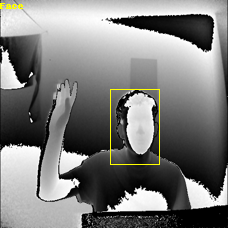

In [ ]:
from PIL import Image
im = Image.open(r'/content/inference_images_1/image_3.png')
im

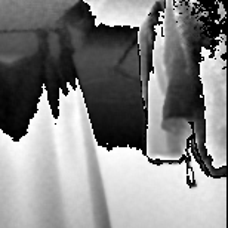

In [ ]:
im = Image.open(r'/content/inference_images_1/image_12.png')
im